# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

import random

pd.set_option('display.max_columns', 250)

In [2]:
churn_data = pd.read_csv('./Data/orange_small_churn_data.txt')
# churn_data.head()

In [3]:
churn_labels = np.loadtxt('./Data/orange_small_churn_labels.txt').astype('int')
churn_labels = np.reshape(churn_labels, (40000, 1))
churn_data['label'] = churn_labels > 0 #convert (-1, 1) to (True, False)

In [4]:
churn_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0,600.0,NaN,20.0,480.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,82752.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.907926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,716008.0,NaN,0.0,NaN,NaN,14599.92,NaN,5.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,144.0,-1209960.0,NaN,NaN,NaN,NaN,NaN,1660.0,NaN,NaN,NaN,66.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0.0,326915.0,604276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,389396.0,NaN,NaN,NaN,2313888.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,599532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,NaN,EkHG,9_Y1,k13i,09_Q,IYzP,GjJ35utlTa_GNSvxxpb9ju,kIsH,NaN,uKAI,L84s,JBfYVit4g8,NaN,NaN,NaN,TDctq2l,KmRo,cJvF,FzaX,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,False
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,NaN,NaN,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212.0,265.0,NaN,2.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2706120.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.870327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,128,0.0,NaN,1661128.0,NaN,0.0,NaN,NaN,67529.09,NaN,25.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,72.0,417932.0,NaN,NaN,NaN,NaN,NaN,1025.0,NaN,NaN,NaN,66.0,NaN,24912.0,40.0,NaN,NaN,NaN,NaN,NaN,0.0,1934460.0,349568.0,NaN,NaN,NaN,NaN,NaN,205.0,NaN,NaN,0.0,18.0,NaN,NaN,NaN,NaN,735.0,NaN,NaN,NaN,6502680.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,364182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0,NaN,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,NaN,JDd6,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,I_mbgcr,NaN,XTbqizz,qMoY,cJvF,FzaX,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,False
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,NaN,NaN,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,220.0,NaN,0.0,72.0,NaN,NaN,311.76,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4698780.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.981628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0

Первые 190 признаков - числовые, остальнные 40 - категориальные.

2\. Рассчитайте доли классов `отток` и `не отток`.

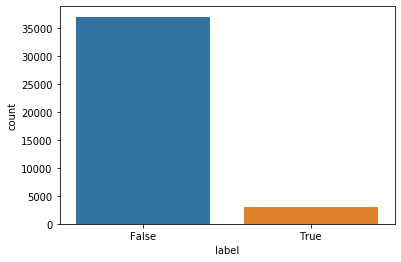

In [5]:
sns.countplot(churn_data.label)
plt.show()

In [6]:
churn_count = churn_data.label.value_counts().to_numpy()
print('Доли классов')
print('Отток: {}, Не отток: {}'.format(churn_count[1]/len(churn_data), churn_count[0]/len(churn_data)))

Доли классов
Отток: 0.0744, Не отток: 0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Подход следующий (см. лекцию 3.2): <br>
* Для бинарных пар можно использовать корреляцию Мэьтьюса
* Для категориальных пар - Коэффициент V Крамера
* Для смешанных пар категориальных и непрерывных величин используем разность их математических ожиданий.

In [7]:
num_data = churn_data.iloc[:, :190]
cat_data = churn_data.iloc[:, 190:230]

Проблема выявленная при визуализации - будем отбирать только те признаки, в которых есть не менее 5000 not  Nan  величин

Непрерывные величины

In [8]:
null_filter = num_data.isnull().sum(axis = 0) < 35000

In [9]:
# Непрерывные величины
mean_target = churn_labels.mean()
num_corr = num_data.loc[:, null_filter].mean(axis = 0).to_frame(name = 'mean delta') - mean_target
num_corr.sort_values(by = 'mean delta', inplace = True, ascending = False)
num_corr.dropna(inplace = True)

In [10]:
num_corr.head()

,mean delta
Var153,6.186850e+06
Var38,2.574738e+06
Var133,2.285475e+06
Var76,1.488973e+06
Var163,4.859452e+05


Категориальные величины

In [11]:
# https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [12]:
null_filter = cat_data.isnull().sum(axis = 0) < 35000

In [13]:
cat_columns_names = cat_data.loc[:, null_filter].columns
cramers_stats = []

for name in cat_columns_names:
    if cat_data[name].isnull().sum() != len(cat_data): #drop columns full of nan`s
        cramers_stats.append(cramers_v(cat_data[name], churn_data['label']))
    else:
        cramers_stats.append(np.nan)
        
cat_corr = pd.DataFrame(zip(cat_columns_names, cramers_stats), columns = ['feature', 'cramer_V'])
cat_corr.set_index('feature', inplace = True)
cat_corr.sort_values(by = 'cramer_V', inplace = True, ascending = False)  
cat_corr.dropna(inplace = True)
cat_corr.head()

,cramer_V
feature,
Var199,0.237375
Var192,0.116264
Var216,0.083442
Var206,0.077436
Var212,0.075150


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [14]:
top_num_features = num_corr.index[:5] #Больше не позволяет память ноутбука

/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


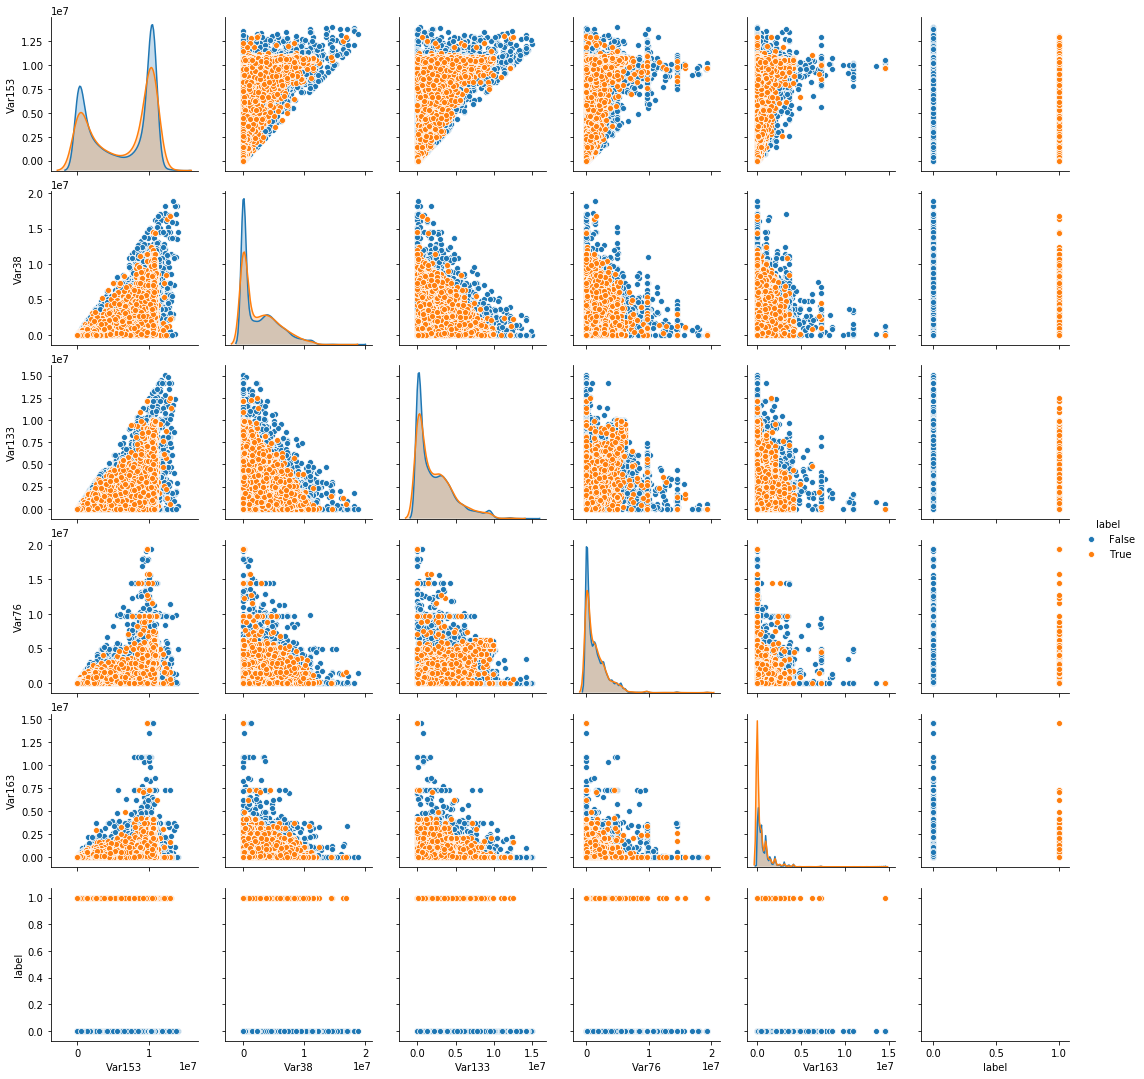

In [15]:
sns.pairplot(data = churn_data[top_num_features.to_list() + ['label']], hue = 'label')
plt.show()

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [22]:
random_num_features = [random.choice(num_corr.index) for i in range(5)]
print(random_num_features)

['Var78', 'Var173', 'Var132', 'Var125', 'Var25']


/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/grigoriy/anaconda3/envs/churn/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


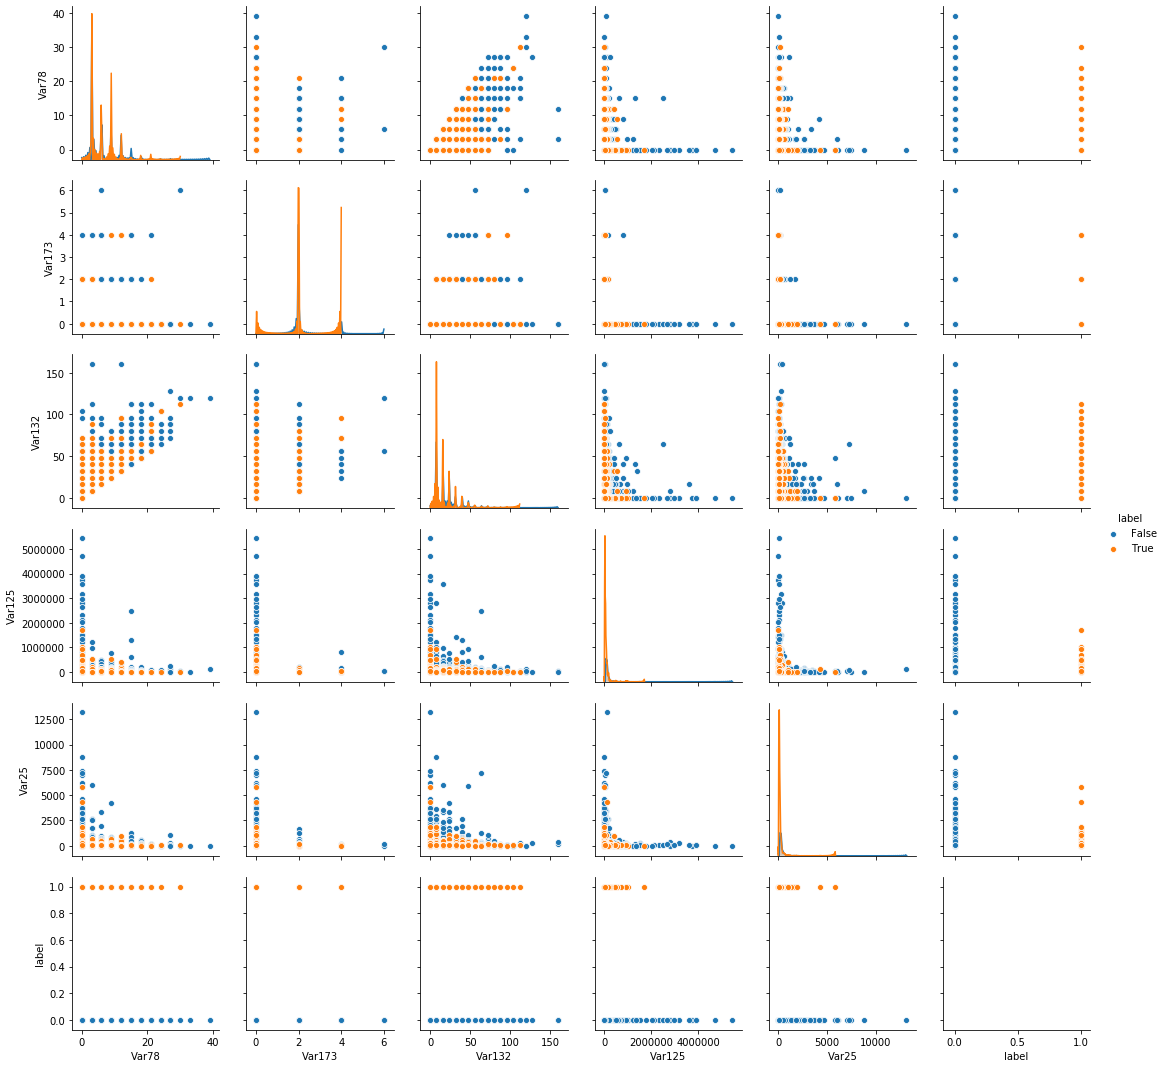

In [24]:
sns.pairplot(data = churn_data[random_num_features + ['label']], hue = 'label')
plt.show()

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [26]:
top_worst_num_features = num_corr.index[-5:]
print(top_worst_num_features)

Index(['Var44', 'Var143', 'Var173', 'Var126', 'Var113'], dtype='object')


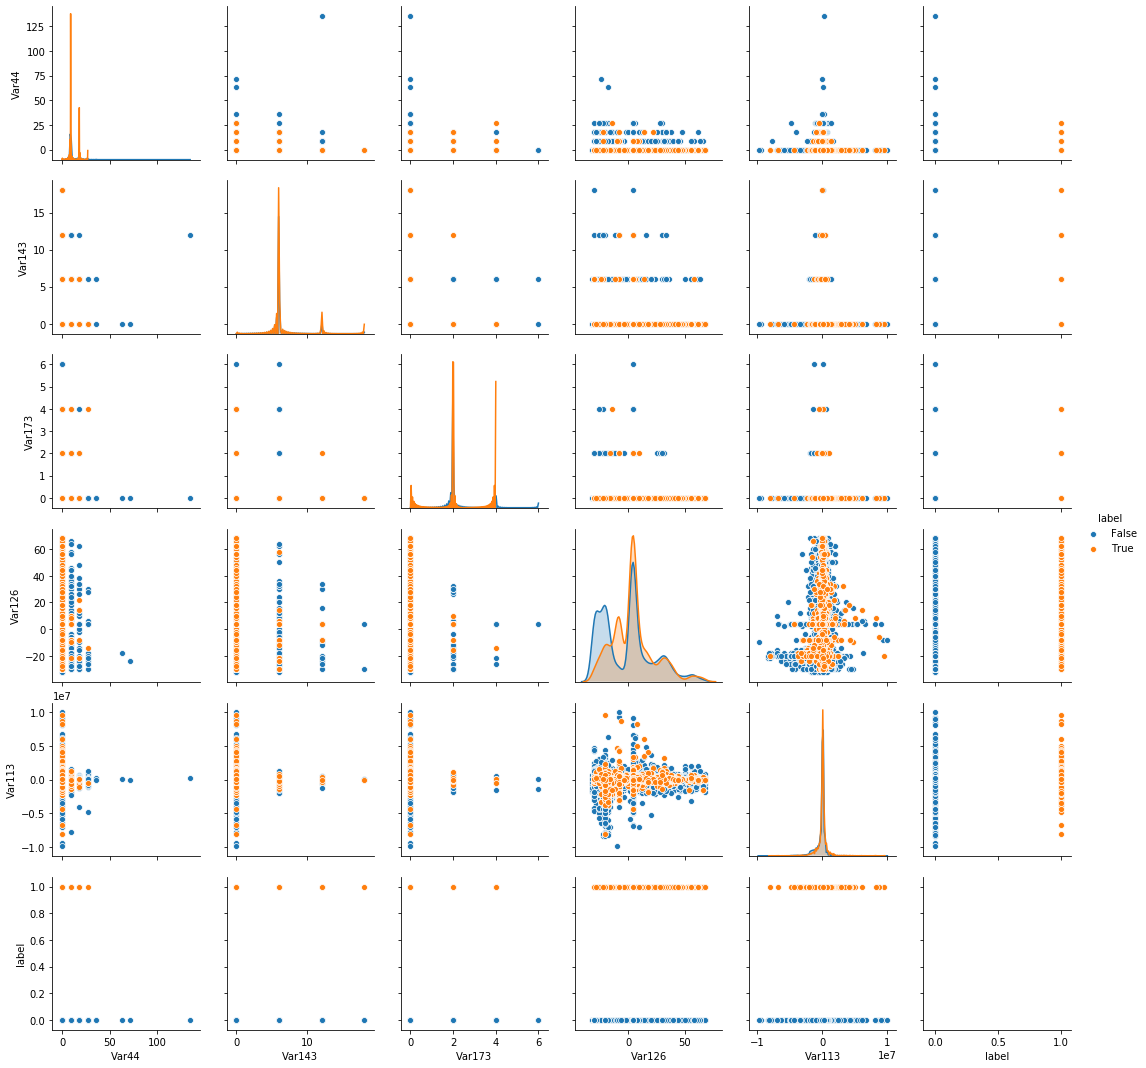

In [28]:
sns.pairplot(data = churn_data[top_worst_num_features.to_list() + ['label']], hue = 'label')
plt.show()

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [32]:
top_cat_features = cat_corr.index[:5]
plot_data = churn_data[top_cat_features.to_list() + ['label']]

CPU times: user 24.6 s, sys: 164 ms, total: 24.8 s
Wall time: 24.8 s


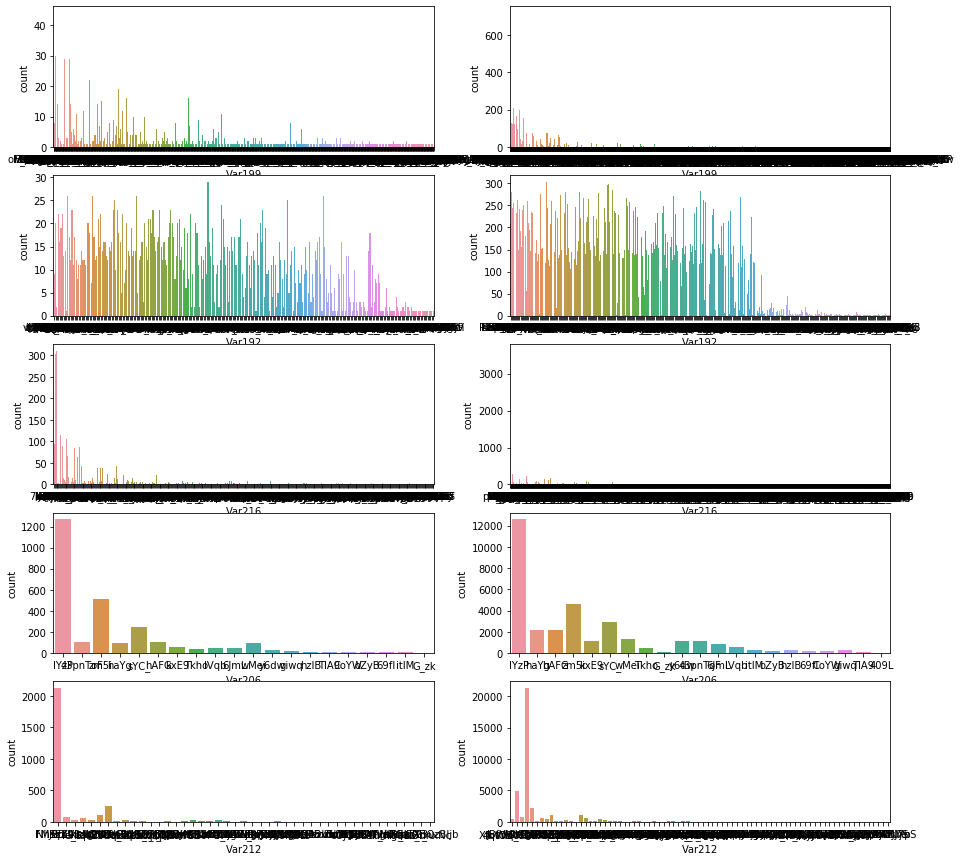

In [38]:
%%time
fig, axs = plt.subplots(5, 2, figsize = (15, 15))
for idx in range(5):
    sns.countplot(data = plot_data[plot_data['label'] == True], x = top_cat_features[idx], ax = axs[idx, 0])
    sns.countplot(data = plot_data[plot_data['label'] == False], x = top_cat_features[idx], ax = axs[idx, 1])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?